# Phase retrieval

## Setup

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)
np.random.seed(42)

## Model

In [2]:
from tramp.experiments import BayesOptimalScenario, qplot, plot_compare_complex
from tramp.models import glm_generative

f_0 GaussBernouilliPrior(size=(2, 1000),rho=0.5,mean=0.01,var=1)
f_1 ComplexLinearChannel(name=F,Nx=2000,Nz=1000,precompute_svd=True)
f_2 ModulusLikelihood(y_name=y,size=2000)


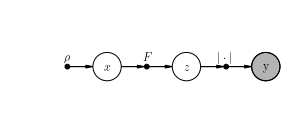

In [3]:
model = glm_generative(
    N=1000, alpha=2, ensemble_type="complex_gaussian", 
    prior_type="gauss_bernouilli", output_type="modulus",
    prior_mean=0.01, prior_rho=0.5 
)
scenario = BayesOptimalScenario(model, x_ids=["x"])
scenario.setup()
scenario.student.plot()

for factor in scenario.student.factors:
    print(factor.id, factor)

# EP dynamics

Damping is needed !

INFO:tramp.algos.message_passing:init message dag with ConstantInit(a=0,b=0)
INFO:tramp.algos.message_passing:no damping
INFO:tramp.algos.message_passing:terminated after n_iter=20 iterations


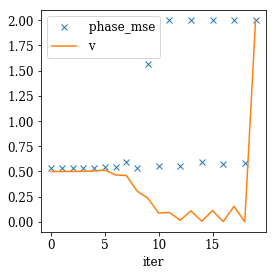

In [4]:
# really bad without damping
from tramp.algos import EarlyStoppingEP
ep_evo = scenario.ep_convergence(
    metrics=["mse", "phase_mse"], max_iter=20
)
qplot(
    ep_evo, x="iter", y=["phase_mse", "v"], 
    y_markers=["x", "-"], y_legend=True
)

INFO:tramp.algos.message_passing:init message dag with ConstantInit(a=0,b=0)
INFO:tramp.algos.message_passing:f_0->x damping=0.3
INFO:tramp.algos.message_passing:f_1->z damping=0.3
INFO:tramp.algos.message_passing:x<-f_1 damping=0.3
INFO:tramp.algos.message_passing:z<-f_2 damping=0.3
INFO:tramp.algos.message_passing:terminated after n_iter=70 iterations


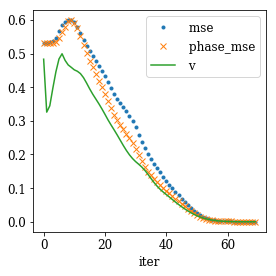

In [5]:
ep_evo = scenario.ep_convergence(
    metrics=["mse", "phase_mse"], max_iter=70, damping=0.3
)
qplot(
    ep_evo, x="iter", y=["mse", "phase_mse", "v"], 
    y_markers=[".", "x", "-"], y_legend=True
)

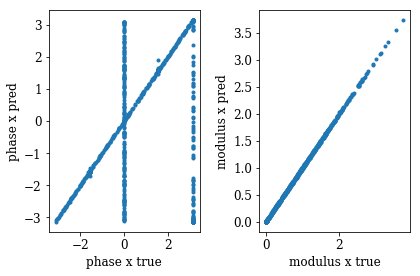

In [6]:
plot_compare_complex(scenario.x_true["x"], scenario.x_pred["x"])

## EP vs SE

In [7]:
rename={
   "alpha":r"$\alpha$", "prior_mean":r"$\mu$", "prior_rho":r"$\rho$",
    "n_iter":"iterations", "source=":"", "phase_mse":"p-mse", 
    "a0=0.1":"uninformed", "a0=1000.0":"informed"
}
ep_vs_se = pd.read_csv("phase_retrieval_ep_vs_se.csv")

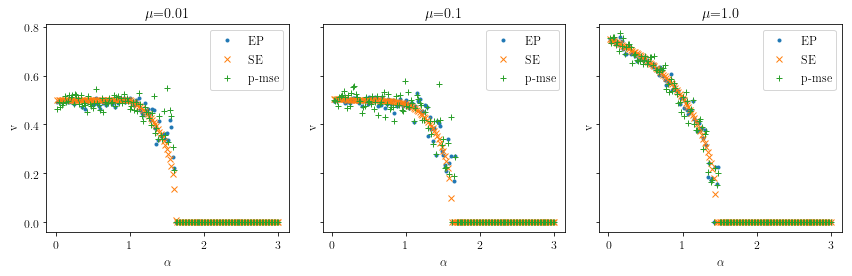

In [8]:
qplot(
    ep_vs_se.query("source!='mse'"), x="alpha", y="v", marker="source", column="prior_mean",
    rename=rename, usetex=True
)

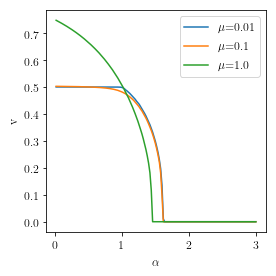

In [9]:
qplot(
    ep_vs_se.query("source=='SE'"), 
    x="alpha", y="v", color="prior_mean",
    rename=rename, usetex=True
)

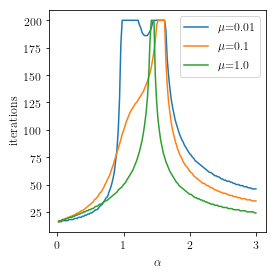

In [10]:
qplot(
    ep_vs_se.query("source=='SE'"), 
    x="alpha", y="n_iter", color="prior_mean",
    rename=rename, usetex=True
)

## MSE curves

MSE vs sparsity $\rho$ at zero mean $\mu=0$. 

In [11]:
mse_curves = pd.read_csv("phase_retrieval_mse_curves.csv")

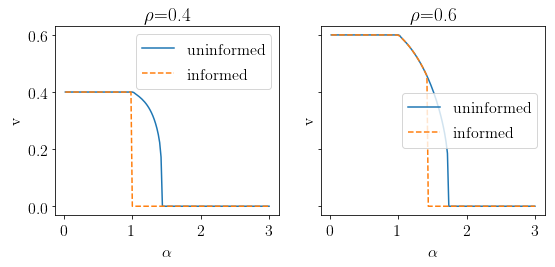

In [12]:
qplot(
    mse_curves, x="alpha", y="v", linestyle="a0", column="prior_rho", 
    rename=rename, usetex=True, font_size=16
)